In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

__1. Loading Dataset__

In [3]:
#Reading 1st input file
redwinequality = pd.read_csv('winequality-red.csv')
df = pd.DataFrame(redwinequality)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print("info of dataset : \n ")
df.info()

info of dataset : 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
print("shape of dataset : \n ")
df.shape

shape of dataset : 
 


(1599, 12)

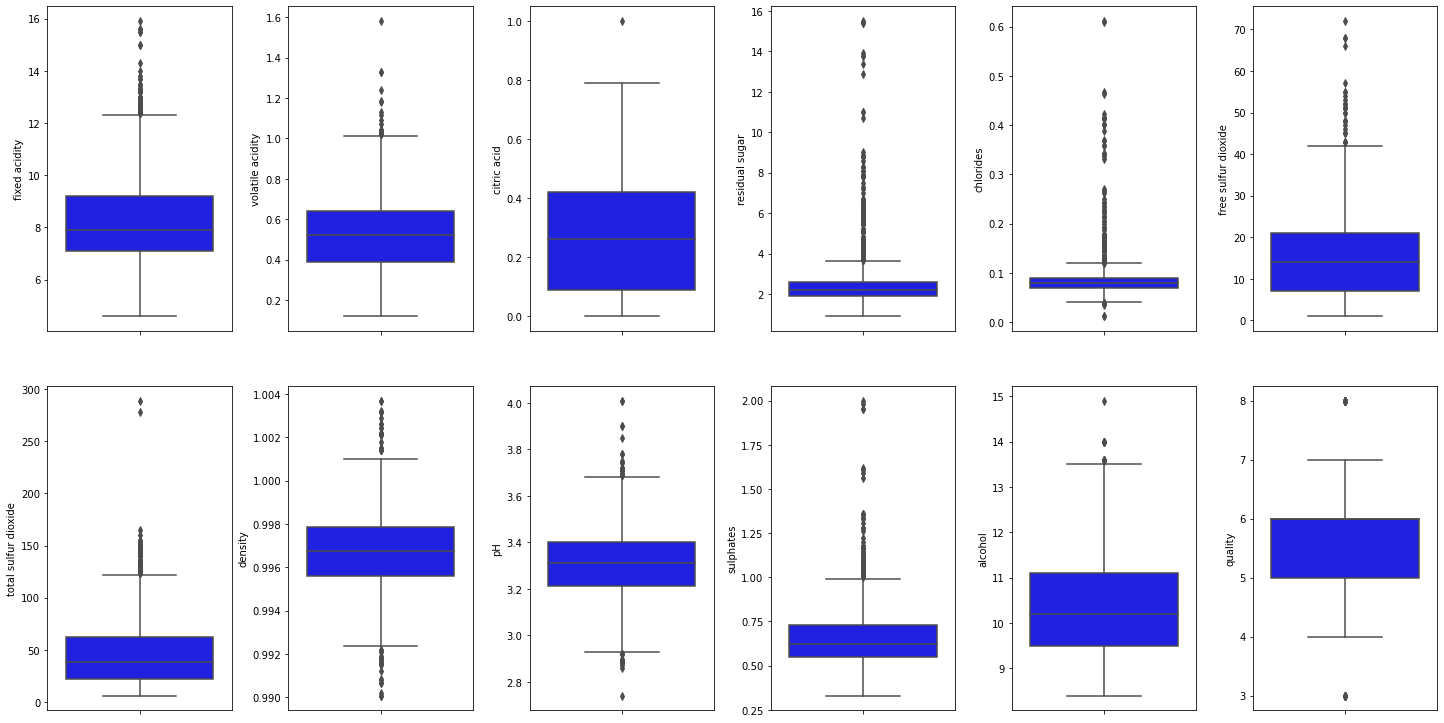

In [7]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='b', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [8]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df = mod_outlier(df)

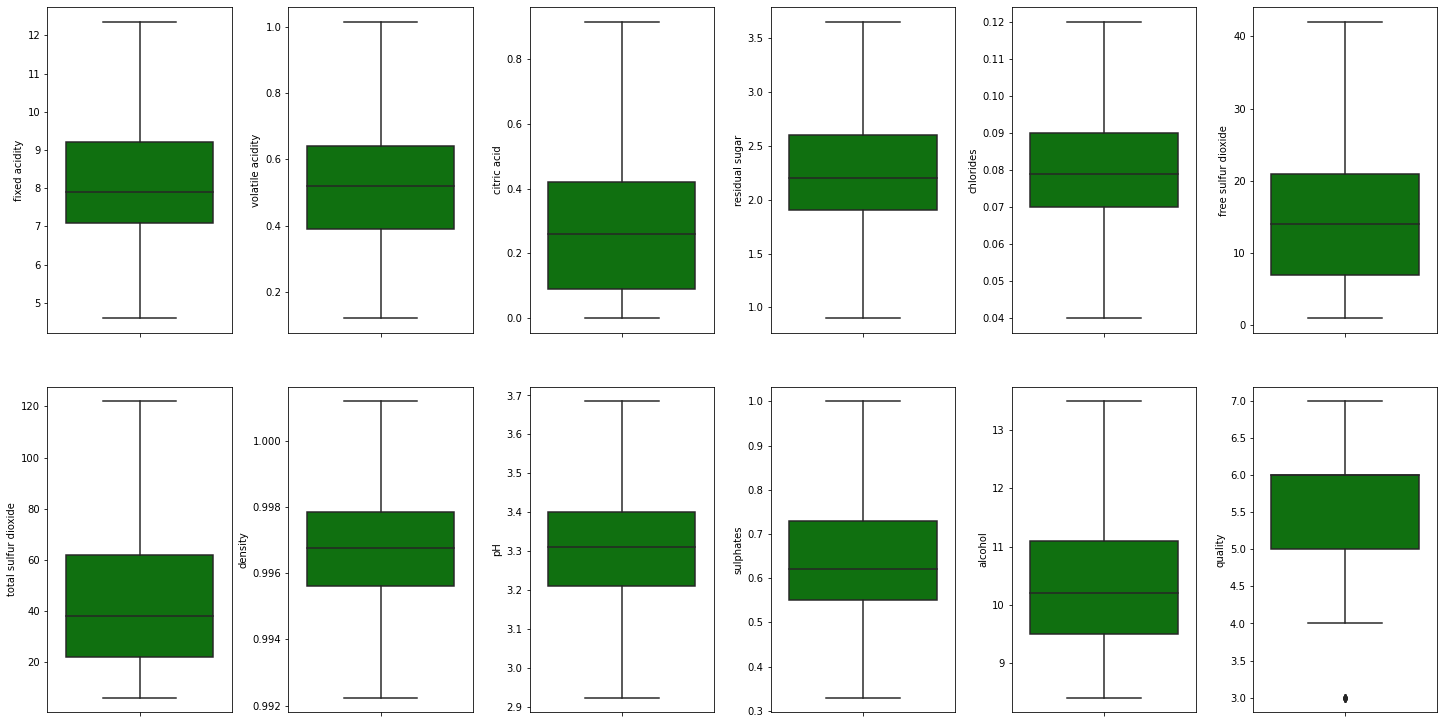

In [9]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()


for col, value in df.items():
    sns.boxplot(y=col, data=df, color='g', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

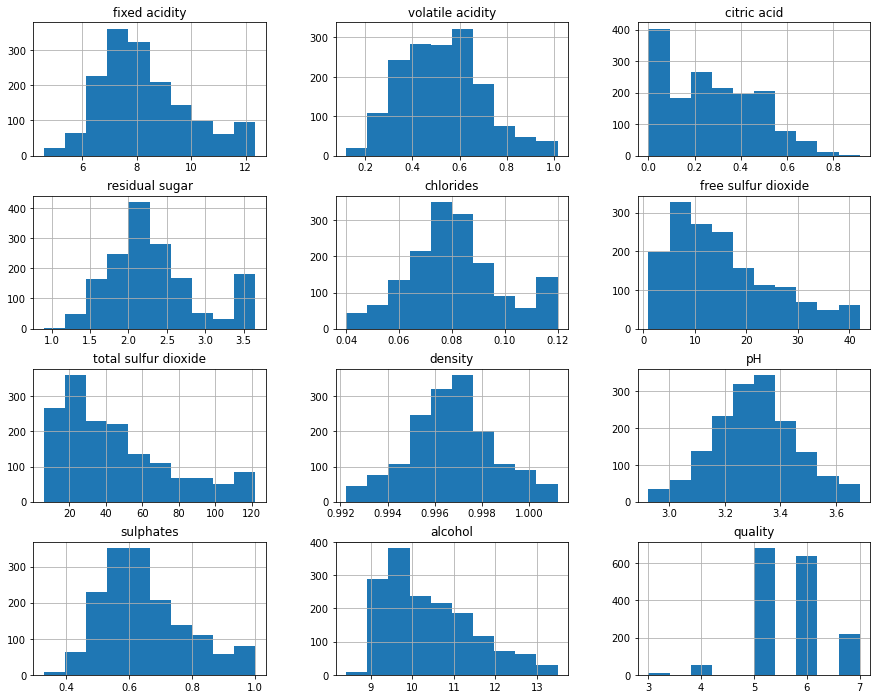

In [12]:
df.hist(bins=10,figsize=(15,12))
plt.show()

In [11]:
nan = df.isnull().sum()
print(nan[nan != 0])

Series([], dtype: int64)


<AxesSubplot:>

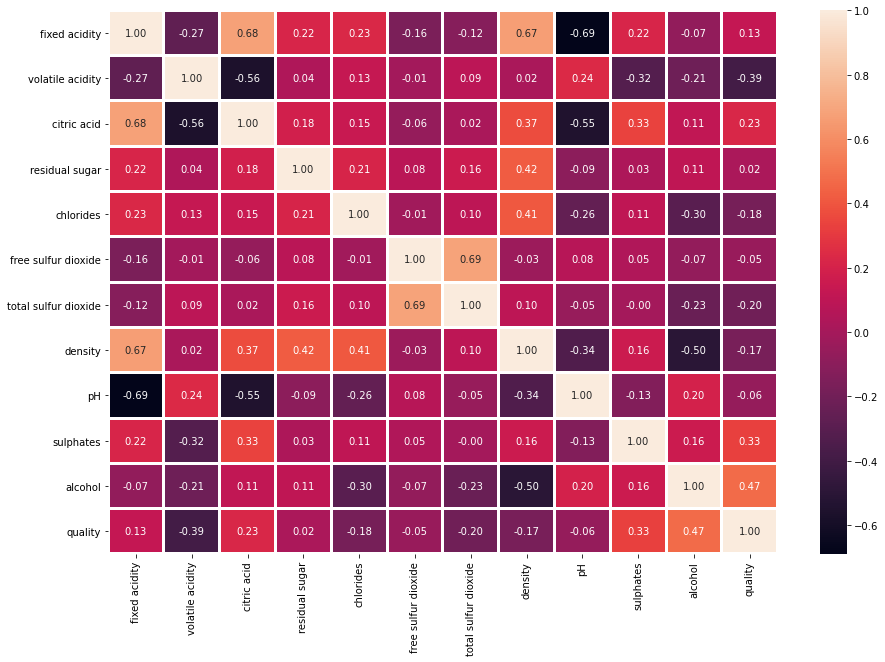

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

In [13]:
#checking the correlation
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.268153,0.678704,0.215090,0.228484,-0.157083,-0.119486,0.668076,-0.689824,0.215195,-0.070242,0.127419
volatile acidity,-0.268153,1.000000,-0.560770,0.039427,0.133096,-0.005288,0.091583,0.017347,0.235347,-0.316181,-0.209385,-0.392223
citric acid,0.678704,-0.560770,1.000000,0.183553,0.147668,-0.060140,0.019277,0.369893,-0.546002,0.333402,0.111640,0.225948
residual sugar,0.215090,0.039427,0.183553,1.000000,0.208471,0.082933,0.157250,0.424354,-0.094584,0.034996,0.107114,0.024207
chlorides,0.228484,0.133096,0.147668,0.208471,1.000000,-0.012169,0.098054,0.407441,-0.259512,0.107645,-0.295608,-0.178933
free sulfur dioxide,-0.157083,-0.005288,-0.060140,0.082933,-0.012169,1.000000,0.687184,-0.034012,0.075415,0.049086,-0.068099,-0.048825
total sulfur dioxide,-0.119486,0.091583,0.019277,0.157250,0.098054,0.687184,1.000000,0.095871,-0.051863,-0.003229,-0.228860,-0.202558
density,0.668076,0.017347,0.369893,0.424354,0.407441,-0.034012,0.095871,1.000000,-0.336870,0.161310,-0.500237,-0.170982
pH,-0.689824,0.235347,-0.546002,-0.094584,-0.259512,0.075415,-0.051863,-0.336870,1.000000,-0.134702,0.195196,-0.059497
sulphates,0.215195,-0.316181,0.333402,0.034996,0.107645,0.049086,-0.003229,0.161310,-0.134702,1.000000,0.155310,0.328045


In [49]:
df.corr()['quality']

fixed acidity           0.127419
volatile acidity       -0.392223
citric acid             0.225948
residual sugar          0.024207
chlorides              -0.178933
free sulfur dioxide    -0.048825
total sulfur dioxide   -0.202558
density                -0.170982
pH                     -0.059497
sulphates               0.328045
alcohol                 0.472662
quality                 1.000000
Name: quality, dtype: float64

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df_std = pd.DataFrame(df_std, columns=df.columns)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df_std.drop(columns='quality'), 
df_std['quality'], test_size= 0.2, random_state=42)
reg = KNeighborsRegressor()

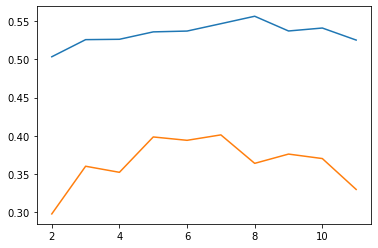

In [60]:
num_features = []
train_score = []
test_score = []

for k in range(2, 12):
    selector = SelectKBest(f_regression, k = k)
    X_train_new = selector.fit_transform(X_train, y_train)
    X_test_new = selector.transform(X_test)
    reg.fit(X_train_new, y_train)
    num_features.append(k)
    train_score.append(reg.score(X_train_new, y_train))
    test_score.append(reg.score(X_test_new, y_test))

sns.lineplot(x = num_features, y = train_score)
sns.lineplot(x = num_features, y = test_score)
plt.show()

In [67]:
selector = SelectKBest(f_regression, k = 5)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)
reg.fit(X_train_new, y_train)
print(reg.score(X_test_new, y_test))

0.3983891035295658


In [68]:
params = {'n_neighbors': range(2, 45), 'weights':['uniform','distance']}
gs = GridSearchCV(estimator=reg, param_grid=params, cv = 3)
gs.fit(X_train_new, y_train)
reg2 = gs.best_estimator_

In [69]:
from sklearn.metrics import r2_score
reg2.fit(X_train_new, y_train)
y_pred = reg2.predict(X_test_new)
r2 = r2_score(y_test, y_pred)
print(r2 ** (1/2))

0.7411519600131431
